In [1]:
# 데이터 분석 패키지
import pandas as pd
import numpy as np

In [70]:
# 모든 컬럼을 출력하도록 설정
pd.set_option('display.max_columns', None)  # None으로 설정하면 모든 컬럼 출력 default:20
# 모든 행을 출력하도록 설정
pd.set_option('display.max_rows', 10)  # None으로 설정하면 모든 행 출력 default:50
# 모든 열의 최대 너비를 설정
pd.set_option('display.max_colwidth', None) # None으로 설정하면 모든 내용을 출력 default:60

In [4]:
# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from wordcloud import WordCloud

In [5]:
# 정규표현식
import re

In [6]:
# 날짜는 파이썬 표준라이브러리 datetime 사용
import datetime

In [7]:
# 오늘 날짜 구하기
today = datetime.datetime.today()
print(today)
today = today.strftime('%Y-%m-%d')
today

2024-12-30 09:45:33.331936


'2024-12-30'

In [8]:
df = pd.read_csv(f'news_{today}.csv')
df.head(1)

,언론사,제목,내용,작성일시
0,매일경제,"“국내 정치 불확실성으로 원달러 환율 급등…현대제철, 수익성 회복 폭 낮아질 것”",\n 사진 확대 현대제철 CI. [사진 = 현대제철] NH투자증권은 30일 현대제철에...,2024-12-30 08:29:19


In [10]:
df.shape

(100, 4)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   언론사     100 non-null    object
 1   제목      100 non-null    object
 2   내용      100 non-null    object
 3   작성일시    100 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


In [12]:
df.describe()

,언론사,제목,내용,작성일시
count,100,100,100,100
unique,2,100,100,85
top,매일경제,"“국내 정치 불확실성으로 원달러 환율 급등…현대제철, 수익성 회복 폭 낮아질 것”",\n 사진 확대 현대제철 CI. [사진 = 현대제철] NH투자증권은 30일 현대제철에...,2024.12.29 17:38
freq,50,1,1,9


In [13]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [15]:
df.duplicated().sum()

0

In [17]:
# 중복행만선택
df[df.duplicated()]

,언론사,제목,내용,작성일시


In [18]:
df['언론사'].value_counts()

언론사
매일경제    50
한국경제    50
Name: count, dtype: int64

#### 텍스트 길이 분석

In [19]:
# 제목,내용 길이
df['제목_길이'] = df['제목'].str.len()
df['내용_길이'] = df['내용'].str.len()

In [20]:
# 제목,내용 토큰 개수
df['제목_토큰_개수']=df['제목'].str.split().str.len()
df['내용_토큰_개수']=df['내용'].str.split().str.len()

In [21]:
df[['제목_길이','제목_토큰_개수','내용_길이','내용_토큰_개수']].describe()

,제목_길이,제목_토큰_개수,내용_길이,내용_토큰_개수
count,100.000000,100.00000,100.000000,100.000000
mean,34.060000,7.36000,1477.070000,303.210000
std,8.768424,2.08661,1090.194768,228.126551
min,10.000000,1.00000,110.000000,16.000000
25%,28.000000,6.00000,849.250000,174.000000
50%,33.500000,7.00000,1060.500000,224.000000
75%,40.000000,9.00000,1723.500000,365.000000
max,53.000000,13.00000,8033.000000,1604.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   언론사       100 non-null    object
 1   제목        100 non-null    object
 2   내용        100 non-null    object
 3   작성일시      100 non-null    object
 4   제목_길이     100 non-null    int64 
 5   내용_길이     100 non-null    int64 
 6   제목_토큰_개수  100 non-null    int64 
 7   내용_토큰_개수  100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


array([[<Axes: title={'center': '제목_길이'}>,
        <Axes: title={'center': '내용_길이'}>],
       [<Axes: title={'center': '제목_토큰_개수'}>,
        <Axes: title={'center': '내용_토큰_개수'}>]], dtype=object)

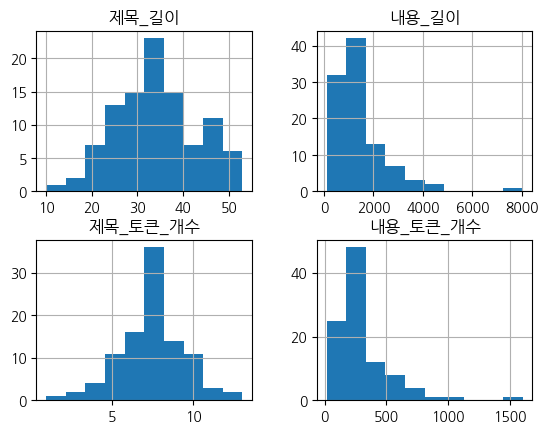

In [23]:
df.hist(bins=10)

In [24]:
df[df['제목_길이'] == df['제목_길이'].max()]

,언론사,제목,내용,작성일시,제목_길이,내용_길이,제목_토큰_개수,내용_토큰_개수
38,매일경제,"“트럼프 집권 후 관세 어찌하나요?” 삼일PwC, ‘트럼프 2기’ 대비 글로벌 통상 전문팀 출범",\n 통상·국제조세·공급망 전문가 구성해외 네트워크 협력도 강점 꼽혀관세 전략부터 공급망 재편까지 ‘...,2024-12-27 14:14:35,53,1052,13,225


#### 워드클라우드 시각화
- https://github.com/amueller/word_cloud

In [25]:
# 제목을 하나의 문자열로 만들기
news_title = ' '.join(df['제목'])
news_title[:100]

'“국내 정치 불확실성으로 원달러 환율 급등…현대제철, 수익성 회복 폭 낮아질 것” 이지영 서울의대 신경과 교수 “GV1001 PSP 2a 임상 데이터 상당히 고무적” “이마트, G'

In [ ]:
WordCloud?

In [31]:
def display_word_cloud(str, max_words=30, width=1200, height=600) :
    font_path = r'C:\Windows\Fonts\malgun.ttf'
    stopwords = ['코스피','코스닥','종목','ETF','주식','주가','상승','하락','상장','투자','서학','동학','기업','시장'
                 '시총','목표가','올해','내년','국내','해외','외국인','소식에','기대감','한국','증시']
    word_cloud = WordCloud(font_path=font_path, 
                      width=width, 
                      height=height,
                      stopwords=stopwords,
                      background_color='white',
                      max_words = max_words,
                      min_word_length = 2,
                      random_state=2024
                    ).generate(str)
    plt.imshow(word_cloud)
    plt.show()
    return word_cloud

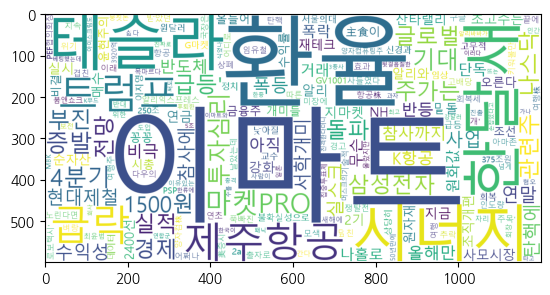

In [33]:
display_word_cloud(news_title,200)

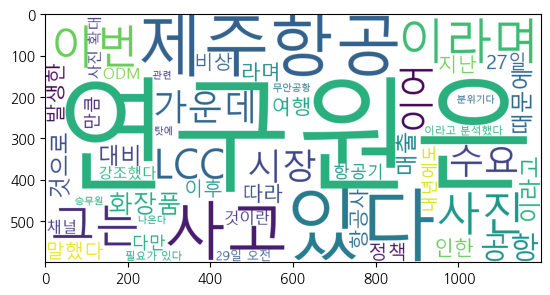

In [35]:
tmp_str = ''.join(df[df['제목'].str.contains('제주항공')]['내용'])
tmp_word_cloud = display_word_cloud(tmp_str,50)

In [ ]:
tmp_word_cloud.words_

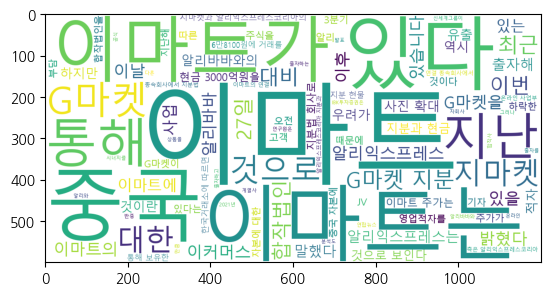

In [37]:
tmp_str = ''.join(df[df['제목'].str.contains('이마트')]['내용'])
tmp_word_cloud = display_word_cloud(tmp_str,100)

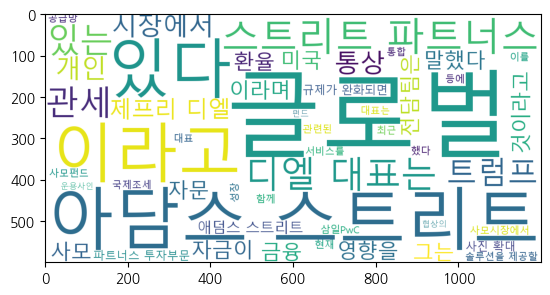

In [38]:
tmp_str = ''.join(df[df['제목'].str.contains('트럼프')]['내용'])
tmp_word_cloud = display_word_cloud(tmp_str,50)

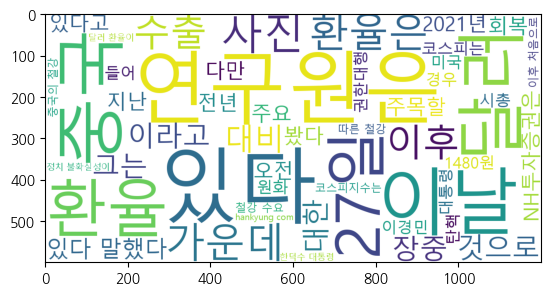

In [39]:
tmp_str = ''.join(df[df['제목'].str.contains('환율')]['내용'])
tmp_word_cloud = display_word_cloud(tmp_str,50)

#### 형태소 분석기로 특정 품사만 추출하기

In [41]:
#!pip install pecab

In [44]:
from pecab import PeCab
pecab = PeCab()


In [45]:
dir(pecab)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_tokenize',
 'morphs',
 'nouns',
 'pos',
 'postprocessor',
 'tokenizer']

In [47]:
text = '아버지가 방에 들어가신다'

In [48]:
print(pecab.morphs(text))
print(pecab.nouns(text))
print(pecab.pos(text))
# print(pecab.postprocessor)
# print(pecab.tokenizer(text))

['아버지', '가', '방', '에', '들어가', '신다']
['아버지', '방']
[('아버지', 'NNG'), ('가', 'JKS'), ('방', 'NNG'), ('에', 'JKB'), ('들어가', 'VV'), ('신다', 'EP+EC')]


In [51]:
pecab.nouns('아버지가 방에 들어가신다 주말 여행 영남권')

['아버지', '방', '주말', '여행', '영남']

In [52]:
# 처리시간이 걸리는 작업의 진행률을 시각화해줌
from tqdm import tqdm
tqdm.pandas()

In [53]:
df['제목_명사'] = df['제목'].progress_map(lambda x : ' '.join(pecab.nouns(x)))

100%|██████████| 100/100 [00:03<00:00, 28.24it/s]


In [55]:
# df['내용_명사'] = df['내용'].progress_map(lambda x : ' '.join(pecab.nouns(x)))

### JDK 설치
1. 최신 버전의 JAVA(JDK)를 설치
2. JAVA_HOME 환경변수를 추가
3. path 환경변수에 %JAVA_HOME%\bin; 추가

### konlpy 설치   
- pip install --upgrade pip
- pip install JPype1   (java,python 연계 역할)
- pip install konlpy --upgrade
- https://konlpy.org/ko/latest/install/

In [57]:
# !pip install --upgrade pip
# !pip install JPype1 (java,python 연계 역할)
# !pip install konlpy --upgrade

In [59]:
from konlpy.tag import Okt
okt = Okt()

In [60]:
txt = '아버지 방에 들어가신다'
okt.morphs(txt)

['아버지', '방', '에', '들어가신다']

In [61]:
okt.pos(txt)

[('아버지', 'Noun'), ('방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]

In [62]:
okt.nouns(txt)

['아버지', '방']

In [63]:
df['내용_명사'] = df['내용'].progress_map(lambda x : ' '.join(okt.nouns(x)))

100%|██████████| 100/100 [00:09<00:00, 10.15it/s]


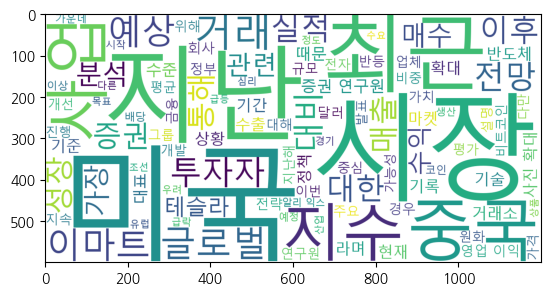

In [64]:
str = ''.join(df['내용_명사'])
dwc = display_word_cloud(str,100)

In [81]:
tmp = df.loc[df[df['내용_명사'].str.contains('테슬라')].index].head(1)['내용'].values[0]
tmp

'\n\n\n미국주식 매수 89% 급증 … 해외투자 美비중 역대 최고지수추종·고배당 ETF 인기순매수 톱10 종목 중 4개 차지3040대 스벅·코카콜라 선호상속·증여 목적 투자도 눈길전문가 "내년도 美쏠림 심화"\n\n\n      사진 확대     \n미국 주식 투자 열풍이 거세지면서  국내 투자자들의 해외 주식 투자 금액 중 미국 비중이 2011년 통계 작성 이후 올해 처음으로 95%를 돌파했다.\n\'서학개미\'들은 연령대를 불문하고 테슬라, 애플, 엔비디아를 앞다퉈 매수했지만 연령대가 높아질수록 배당주를 선호하는 경향을 보였다.\n29일 한국예탁결제원에 따르면 국내 투자자들의 미국 주식 매수 금액은 이달 26일까지 올해 총 2553억8000만달러(약 375조3575억원)로 해외 주식 전체 매수 금액에서 차지하는 비중이 96.2%를 기록했다.\n관련 통계 집계가 시작된 2011년 이후 14년 만에 처음으로 95%를 넘어섰다. 한국 투자자들의 미국 주식 매수는 코로나19 대유행이 있었던 2020년을 기점으로 급증했고 2021년 처음 미국 주식 매수 비중이 90%를 돌파한 바 있다. 올해 미국 주식 매수 금액은 작년 대비 약 89% 증가했다.\n이날 예탁결제원에 따르면 이달 26일까지 집계된 국내 투자자들의 미국 주식 보관 금액은 총 1178억6832만달러(약 173조9736억원)로, 작년 대비 73% 늘어났다. 기존에 투자해온 미국 주식 주가가 오른 데다 신규 혹은 추가 매수가 늘어난 결과다.\n한국 투자자들의 올해 해외 주식 순매수 인기 종목을 들여다보면 스탠더드앤드푸어스(S&P)500지수 추종 상장지수펀드(ETF)나 배당주 ETF가 눈에 띈다.\n예탁결제원 집계를 보면 해외 주식 상위 종목 중 3개가 미국 지수 추종 및 배당주 ETF다. 1위인 테슬라에 이어 2위는 뱅가드 S&P500 ETF, 3위는 슈와브 US 배당주 ETF, 4위는 팰런티어, 5위는 인베스코QQQ트러스트 ETF이며 8위는 SPDR S&P500 ETF다. 엔비디아는 10위 안에 포함되

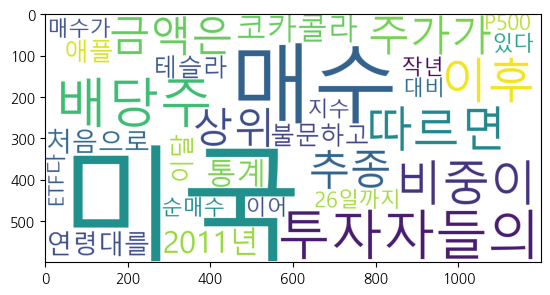

In [82]:
display_word_cloud(tmp,30)

In [84]:
len(okt.pos(tmp))

850

In [ ]:
# 중복된 어휘 제거
unique_words = []
pos_list = []
for word, tag in okt.pos(tmp) :
    if word not in unique_words:
        unique_words.append(word)
        pos_list.append(tag)
len(unique_words)        
for item in zip(unique_words,pos_list) :
    print(item[0], item[1])

In [88]:
df.columns

Index(['언론사', '제목', '내용', '작성일시', '제목_길이', '내용_길이', '제목_토큰_개수', '내용_토큰_개수',
       '제목_명사', '내용_명사'],
      dtype='object')

In [89]:
df.to_csv(f'news_preprocessed_{today}.csv', index=False)